#**EDA** (Explotary Data Analysis)

#**Read and view file**

In [14]:
import numpy as np
import pandas as pd

df = pd.read_csv(r'/content/drive/My Drive/0. STUDYING Peo Peo/PYTHON/Py4DS_Lab2/Py4DS_Lab2_Dataset/HappinessReport2020.csv')
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


#**Summary-statistic**

In [15]:
df.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,153.00000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,1.530000e+02,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,5.47324,0.053538,5.578175,5.368304,9.295706,0.808721,64.445529,0.783360,-0.014568,0.733120,1.972317e+00,0.868771,1.155607,0.692869,0.463583,0.189375,0.130718,1.972317
std,1.11227,0.018183,1.096823,1.128631,1.201588,0.121453,7.057848,0.117786,0.151809,0.175172,1.336643e-15,0.372416,0.286866,0.254094,0.141172,0.100401,0.113097,0.563638
min,2.56690,0.025902,2.628270,2.505530,6.492642,0.319460,45.200001,0.396573,-0.300907,0.109784,1.972317e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.257241
25%,4.72410,0.040698,4.826248,4.603149,8.350645,0.737217,58.961712,0.714839,-0.127015,0.683019,1.972317e+00,0.575862,0.986718,0.495443,0.381457,0.115006,0.055805,1.629928
50%,5.51500,0.050606,5.607728,5.430644,9.456313,0.829204,66.305145,0.799805,-0.033665,0.783122,1.972317e+00,0.918549,1.203987,0.759818,0.483293,0.176745,0.098435,2.046272
75%,6.22850,0.060677,6.363886,6.138881,10.265124,0.906747,69.289192,0.877709,0.085429,0.849151,1.972317e+00,1.169229,1.387139,0.867249,0.576665,0.255510,0.163064,2.350267
max,7.80870,0.120590,7.869766,7.747634,11.450681,0.974670,76.804581,0.974998,0.560664,0.935585,1.972317e+00,1.536676,1.547567,1.137814,0.693270,0.569814,0.533162,3.440810


#**1. Pie plot**

Regional indicator
Central and Eastern Europe            169.586955
Commonwealth of Independent States    110.486805
East Asia                              61.901367
Latin America and Caribbean           195.363496
Middle East and North Africa          165.132013
North America and ANZ                  42.839677
South Asia                             59.916435
Southeast Asia                         84.301627
Sub-Saharan Africa                    308.258175
Western Europe                        224.456443
Name: Logged GDP per capita, dtype: float64


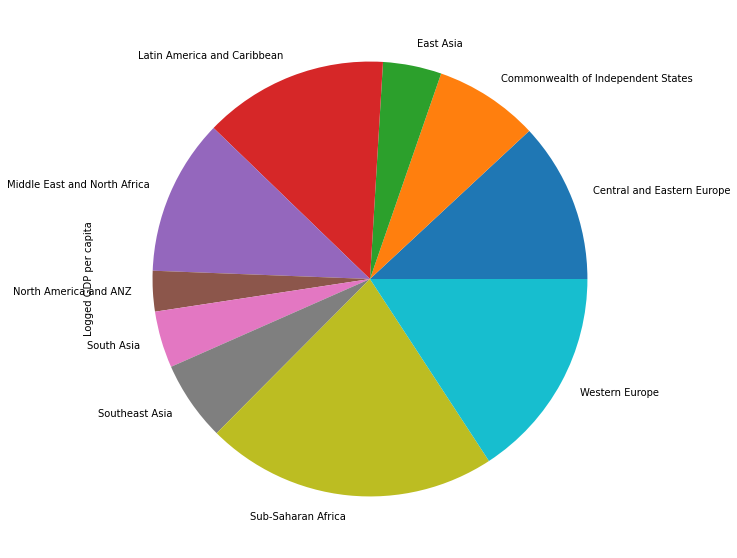

In [16]:
print(df.groupby('Regional indicator')['Logged GDP per capita'].sum())
df.groupby('Regional indicator')['Logged GDP per capita'].sum().plot.pie(figsize = (10, 10))

**Giải thích chi tiết (biểu đồ):**

- Nhìn vào biểu đồ, ta thấy rằng tổng GDP ở các khu vực sub-saharan of africa (Vùng hạ của sa mạc Sahara) và Western Europe là các khu vực chiếm trọng số lớn hơn hẳn các vùng còn lại

- Tổng GDP của 3 vùng North America and ANZ, Southeast Asia và South Asia lại chiếm tỷ lệ rất ít.
- Tuy nhiên, tổng GDP này không thể phản ánh mức sống của các khu vực bởi một số khu vực có rất ít quốc gia như North America and ANZ, do đó khi dùng biểu đồ tròn cho GDP ta nên xét cả 2 hàm là sum() và mean().


Regional indicator
Central and Eastern Europe             9.975703
Commonwealth of Independent States     9.207234
East Asia                             10.316895
Latin America and Caribbean            9.303024
Middle East and North Africa           9.713648
North America and ANZ                 10.709919
South Asia                             8.559491
Southeast Asia                         9.366847
Sub-Saharan Africa                     7.904056
Western Europe                        10.688402
Name: Logged GDP per capita, dtype: float64


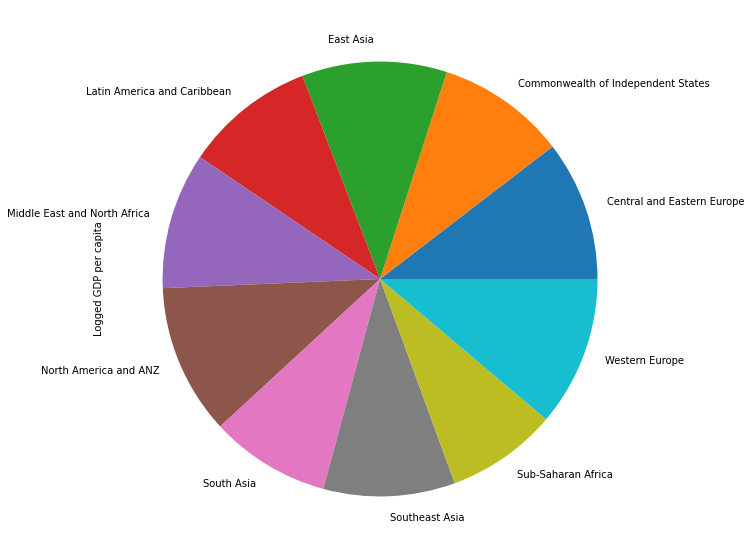

In [17]:
print(df.groupby('Regional indicator')['Logged GDP per capita'].mean())
df.groupby('Regional indicator')['Logged GDP per capita'].mean().plot.pie(figsize = (10, 10))

**Giải thích chi tiết (biểu đồ):**


Khi dùng mean
- Trường hợp tỉ lệ nghịch giữa "Tổng GDP" và "Trung bình GDP":
  - Khu vực North America and ANZ dù có "Tổng GDP" thấp nhất nhưng có "Trung bình GDP" cao nhất trong tất cả các khu vực. 

    Tương tự khu vực North America and ANZ thì khu vực East Asia cũng có "Tổng GDP" thấp nhưng có "Trung bình GDP" cao.

  - Còn khu vực Sub-Saharan of Africa ban đầu có tổng GDP cao nhất nhưng khi tính về trung bình GDP thì đây là khu vực có mức thấp nhất.

- Trường hợp tỉ lệ thuận giữa "Tổng GDP" và "Trung bình GDP":
  - Khu vực Western Europe  có "Tổng GDP" và "Trung bình GDP" đều cao.

Conclusion: Tổng GDP sẽ không phản ánh được mức sống tại mỗi quốc gia, phải dùng  Trung bình GDP để biết rõ mức sống này. Nhìn vào số liệu và biểu đồ ta có thể thấy 3 khu vực có mức sống cao (theo thứ tự giảm dần) là North America and ANZ , Western Europe và East Asia. Còn Sub-Saharan Africa là khu vực có mức sống thấp nhất.

#**2. Box-plot. Biểu đồ hình hộp.**



count    153.000000
mean      64.445529
std        7.057848
min       45.200001
25%       58.961712
50%       66.305145
75%       69.289192
max       76.804581
Name: Healthy life expectancy, dtype: float64


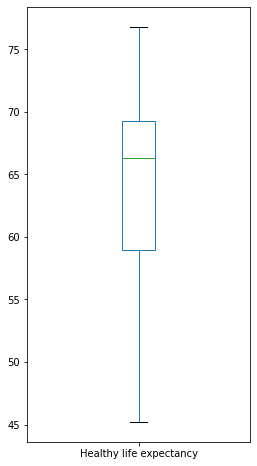

In [18]:
df['Healthy life expectancy'].plot(kind = 'box', figsize = (4, 8));
print(df['Healthy life expectancy'].describe())



* Nhìn vào kết quả trong cú pháp dataframe.describe(), ta chỉ cần quan tâm các giá trị sau

                      min       45.200001
                      25%       58.961712     (Q1)
                      50%       66.305145     (Q2)
                      75%       69.289192     (Q3)
                      max       76.804581

* Theo đó, hình hộp chữ nhật trong boxplot sẽ giới hạn bởi các đường Q1 = 58.96 và Q3 = 69.289 và đường phân đôi hình chữ nhật này chính là Q2 (trung vị) = 66.305.
* Khoảng giá trị [Q1, Q3] (trung tâm của boxplot) cho biết có đến 50% dữ liệu được phân bố tập trung trong khoảng này.

* Từ các giá trị Q1, Q2, Q3 cho thấy dữ liệu trong biến Healthy life expectancy đang lệch, cụ thể vì Q2 gần Q3 rất nhiều so với Q1 nên dữ liệu có trung vị cao hơn so với trung bình của biến Healthy life expectancy. Ngoài ra, ta dễ dàng tính được

                          IQR = Q3 - Q1 = 10.327

    từ đó tính được

                          a = max(45.20, 58.961 - 1.5*IQR) = 45.2
                          b = min(76.804, 76.289 + 1.5*IQR) = 76.804

    như vậy dữ liệu trong biến Healthy life expectancy không có outliers.



#**3. Biểu đồ cột - histogram.**

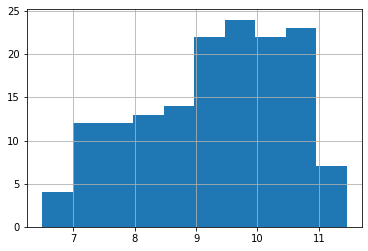

In [19]:
df['Logged GDP per capita'].hist(bins = 10)


- Trục tung đang là đếm số dữ liệu rơi vào một cột nào đó, ví dụ có 4 dữ liệu nằm trong khoảng [3, 7], 12 dữ liệu trong khoảng (7, 8], ... và chỉ có 7 dữ liệu trên mức 10.8. Điều này có nghĩa là trong 153 quốc gia đang được khảo sát thì chỉ có 4 quốc gia có mức thu nhập Logged GDP per capita dưới 7, ..., và 7 quốc gia có thu nhập rất cao (trên 10.8).

- Hầu hết dữ liệu phân bố tập trung ở khoảng [7, 9.5] phản ánh rằng có đến gần 2/3 trong tổng số các quốc gia được khảo sát có thu nhập dưới mức.




#**4. Heat-map. Biểu đồ nhiệt.**

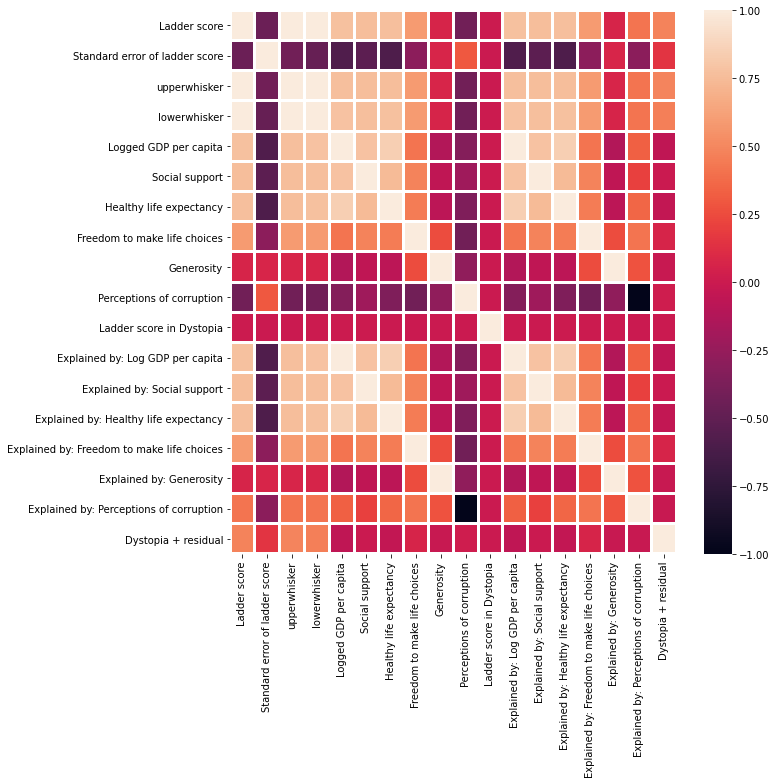

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize = (10, 10))
sns.heatmap(df.corr(), linewidths = 2, ax = ax)

